# COVID-19 detection through lungs X-Ray using CNN

# Importing the Libraries 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing.image import ImageDataGenerator

# Initialising the CNN

In [5]:
model=Sequential()

# Adding  first convolution layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))

# MaxPooling for first conv layer
model.add(MaxPooling2D((2,2)))

# Adding first dropout layer
model.add(Dropout(0.25))

# Adding second convolution layer
model.add(Conv2D(64,(3,3),activation="relu"))

# MaxPooling for second conv layer
model.add(MaxPooling2D((2,2)))

# Adding second dropout layer
model.add(Dropout(0.25))

# Adding third convolution layer
model.add(Conv2D(128,(3,3),activation="relu"))

# MaxPooling for third conv layer
model.add(MaxPooling2D((2,2)))

# Adding third dropout layer
model.add(Dropout(0.25))

#Flatten the layers
model.add(Flatten())


model.add(Dense(1,activation="sigmoid"))


In [6]:
#Compiling the CNN
model.compile(loss=keras.losses.binary_crossentropy,optimizer="adam",metrics=["accuracy"])

# Fitting the CNN to the images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
history=model.fit_generator(training_set,
                         steps_per_epoch=8,
                         epochs=8,
                         validation_data=test_set,
                         validation_steps=2)

Epoch 1/8
8/8 [==============================] - 60s 7s/step - loss: 1.0343 - accuracy: 0.5547 - val_loss: 0.6898 - val_accuracy: 0.7000
Epoch 2/8
8/8 [==============================] - 56s 7s/step - loss: 0.6345 - accuracy: 0.6445 - val_loss: 0.6368 - val_accuracy: 0.6000
Epoch 3/8
8/8 [==============================] - 62s 8s/step - loss: 0.5088 - accuracy: 0.7070 - val_loss: 0.3651 - val_accuracy: 0.8500
Epoch 4/8
8/8 [==============================] - 61s 8s/step - loss: 0.3600 - accuracy: 0.8438 - val_loss: 0.2285 - val_accuracy: 0.9333
Epoch 5/8
8/8 [==============================] - 61s 8s/step - loss: 0.3271 - accuracy: 0.8828 - val_loss: 0.2733 - val_accuracy: 0.9667
Epoch 6/8
8/8 [==============================] - 61s 8s/step - loss: 0.2242 - accuracy: 0.8906 - val_loss: 0.2233 - val_accuracy: 0.9500
Epoch 7/8
8/8 [==============================] - 62s 8s/step - loss: 0.2069 - accuracy: 0.9180 - val_loss: 0.1319 - val_accuracy: 0.9667
Epoch 8/8
8/8 [==========================

# Results

In [12]:
FROM sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test_set,3)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,y_pred))


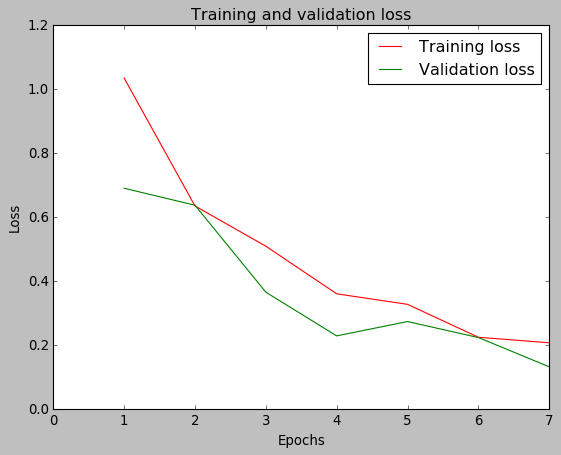

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.style.use("classic")
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,7)
plt.legend()
plt.show()

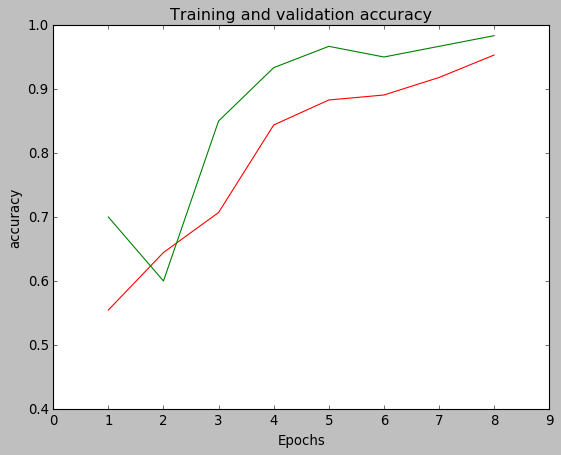

In [14]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.style.use("classic")
plt.plot(epochs, loss, color='red',)
plt.plot(epochs, val_loss, color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.ylim(0.4,1)
plt.xlim(0,9)

plt.show()

In [15]:
import seaborn as sns

chest xray of covid patient


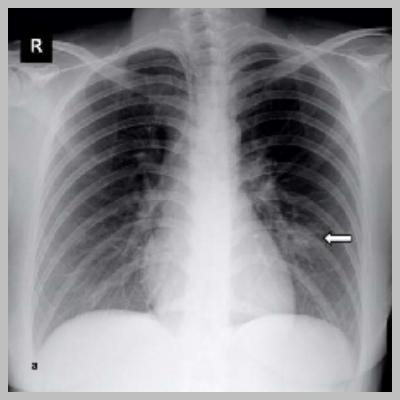

In [27]:
X=X.reshape((224,224,3))
print("chest xray of covid patient")
plt.axis("off")
plt.imshow(X)
plt.show()

In [20]:
a=image.load_img("1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png",target_size=((224,224)))
a=image.img_to_array(a)
a=a.reshape((1,224,224,3))
a=a/255.0

In [21]:
X=a

In [22]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    plt.style.use("classic")
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            ax[row][col].axis("off")
            activation_index += 1

output from layer 2


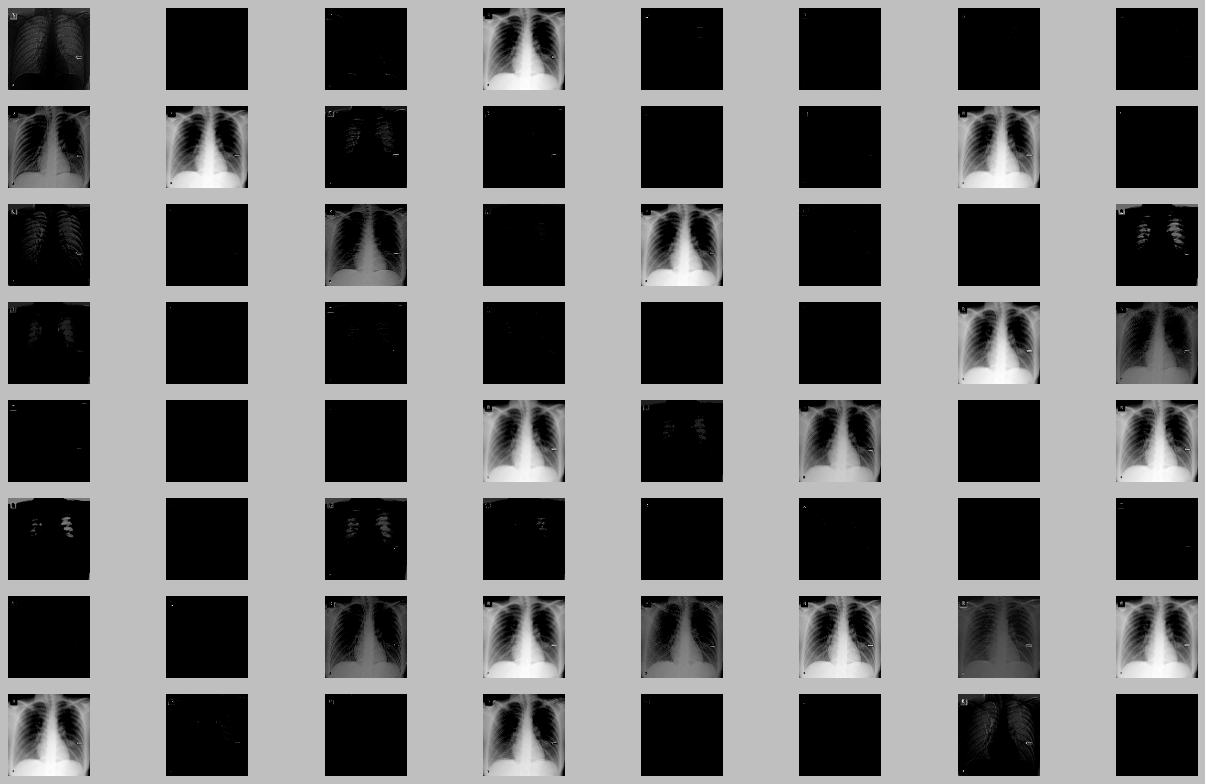

In [23]:
print("output from layer 2")
display_activation(activations, 8, 8, 1)

output from  layer 4


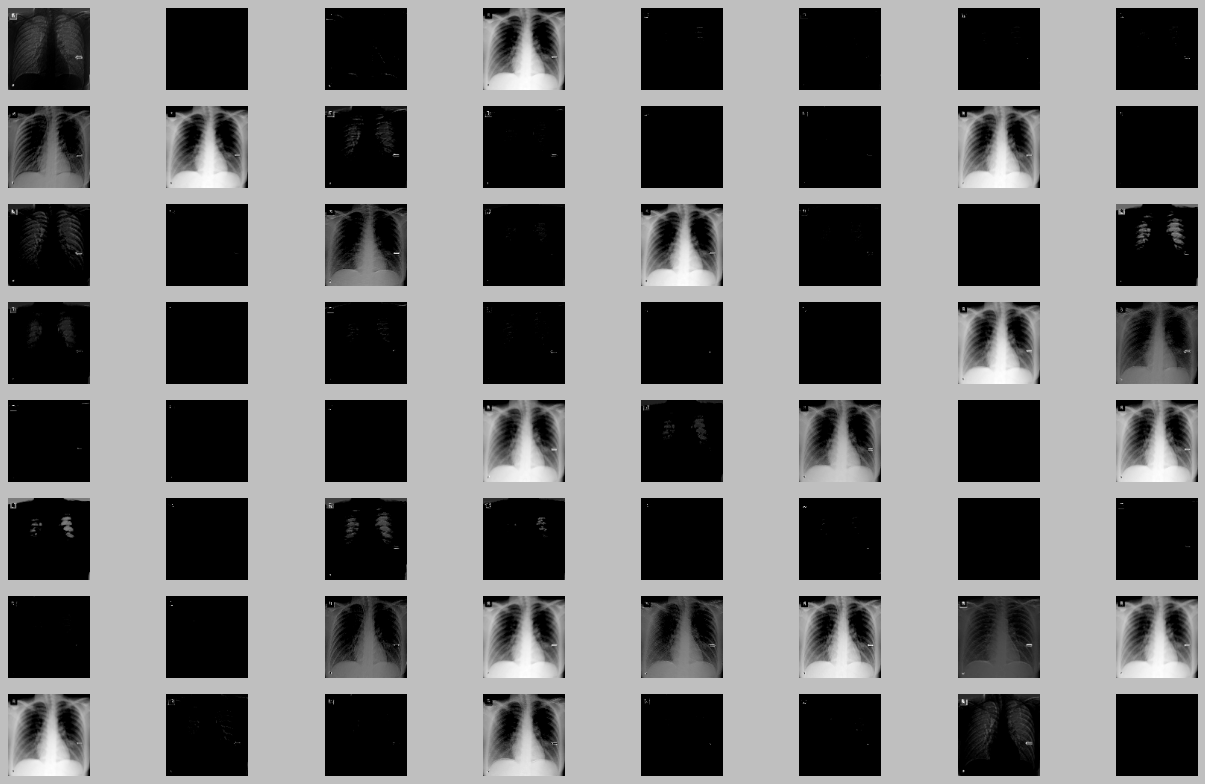

In [24]:
print("output from  layer 4")
display_activation(activations, 8, 8, 3)

output from  layer 8


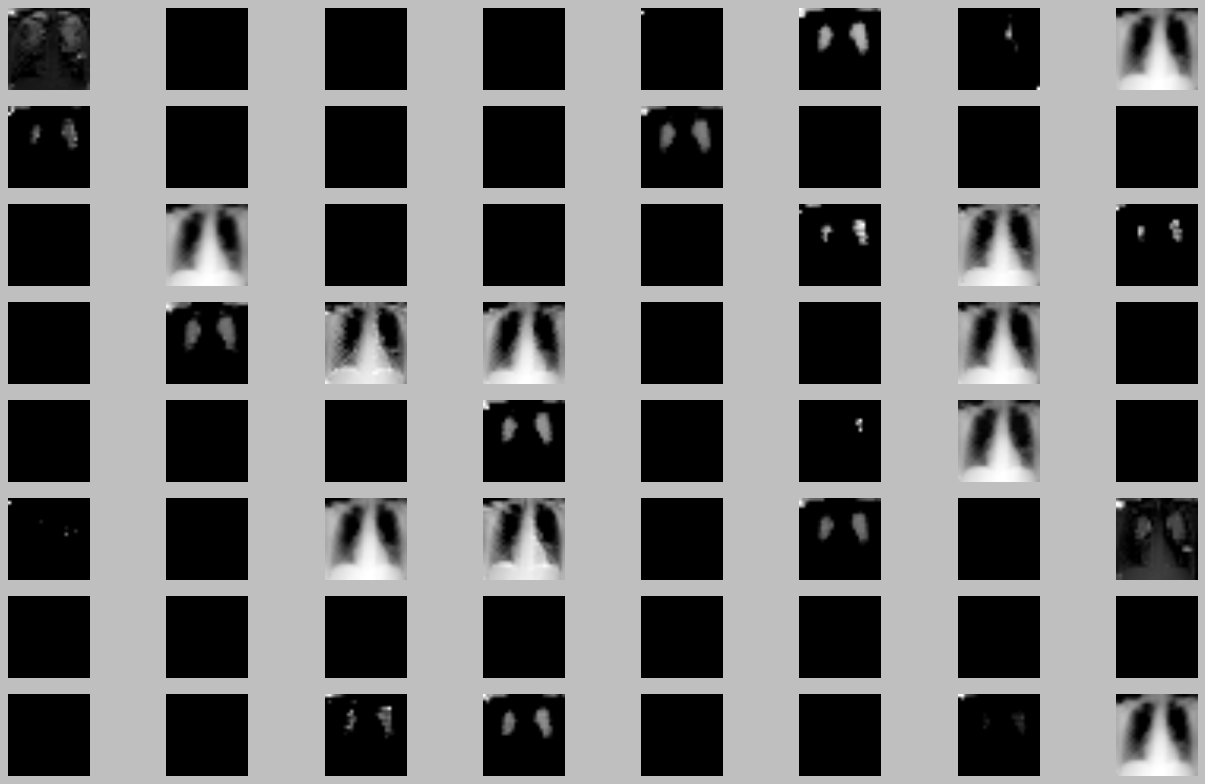

In [25]:
print("output from  layer 8")
display_activation(activations, 8, 8, 8)

In [26]:
model.save('bestmodel'+'.h5')